# 1. Load dữ liệu thô

In [1]:
import sys, os
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

# Cell 1: Load dữ liệu thô
from src.data_processing import load_airbnb, convert_columns
import numpy as np

header, rows_raw = load_airbnb()
cols_dict = convert_columns(rows_raw, header)
num_rows = len(rows_raw)

if num_rows > 0:
    print(f"\nKích thước dữ liệu thô: {num_rows} dòng.")

# Tách cột numeric và categorical
numeric_cols = [name for name, d in cols_dict.items() 
                if d["is_numeric"] and name not in ["id", "host_id"]]

categorical_cols = [name for name, d in cols_dict.items() 
                    if not d["is_numeric"] or name in ["id", "host_id"]]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)



Numeric columns: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


--- PHÂN TÍCH TÍNH HỢP LỆ VÀ MISSING CỦA CÁC CỘT SỐ THÔ ---

>>> latitude (dtype: float64)
Missing (NaN) = 0
Min=40.50, Max=40.91, Mean=40.73, Median=40.72, Std=0.05


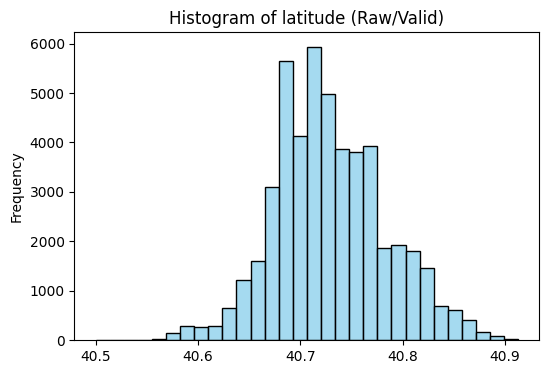

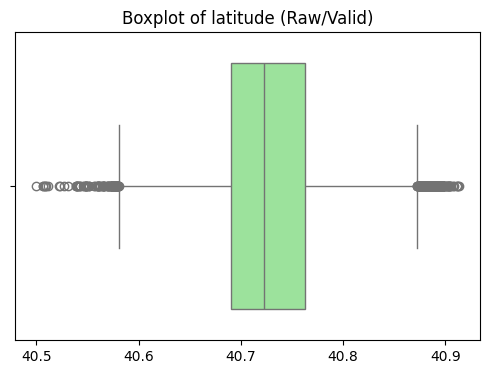


>>> longitude (dtype: float64)
Missing (NaN) = 0
Min=-74.24, Max=-73.71, Mean=-73.95, Median=-73.96, Std=0.05


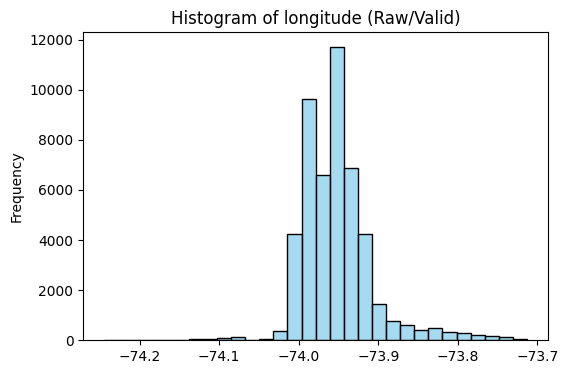

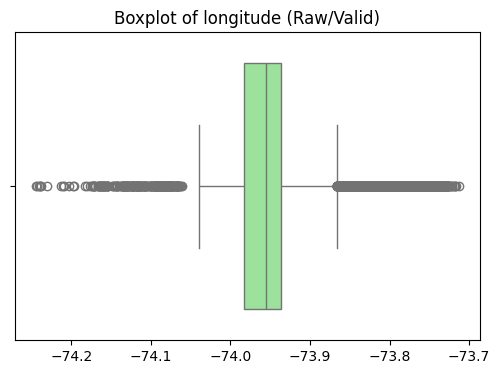


>>> price (dtype: float64)
Missing (NaN) = 0
Min=0.00, Max=10000.00, Mean=152.72, Median=106.00, Std=240.15


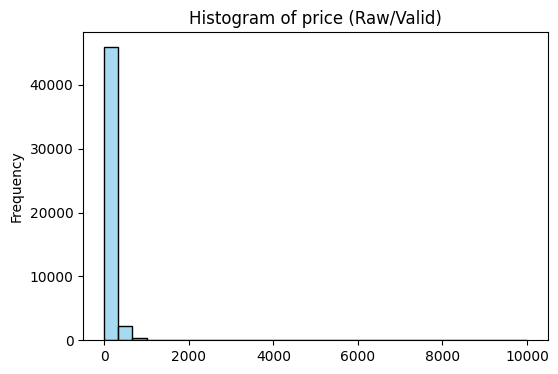

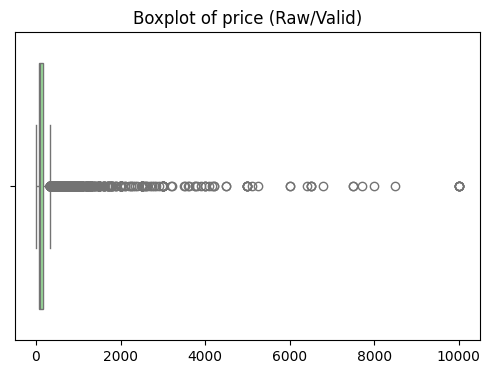


>>> minimum_nights (dtype: float64)
Missing (NaN) = 0
Min=1.00, Max=1250.00, Mean=7.03, Median=3.00, Std=20.51


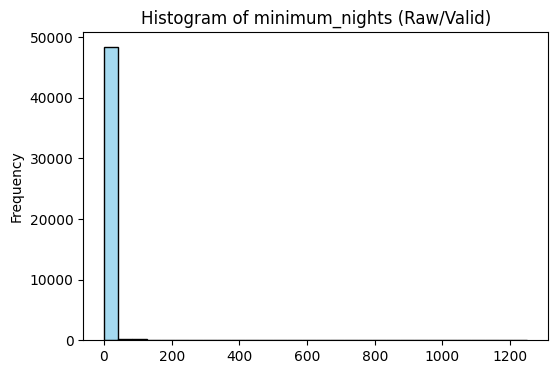

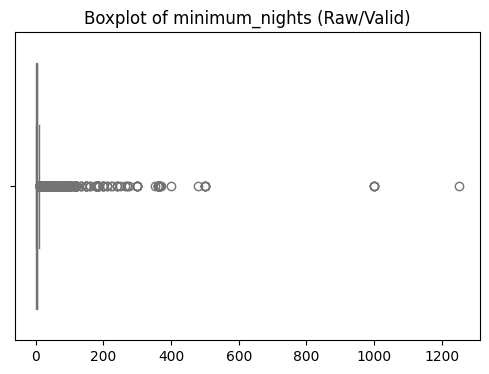


>>> number_of_reviews (dtype: float64)
Missing (NaN) = 0
Min=0.00, Max=629.00, Mean=23.27, Median=5.00, Std=44.55


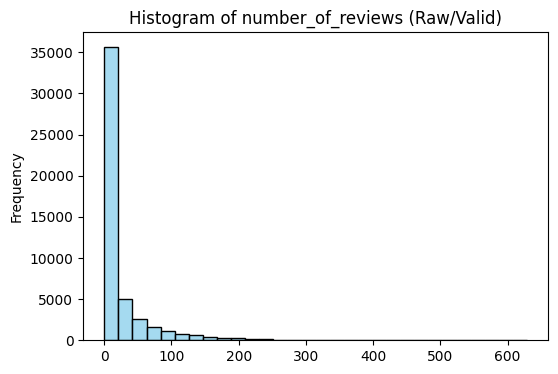

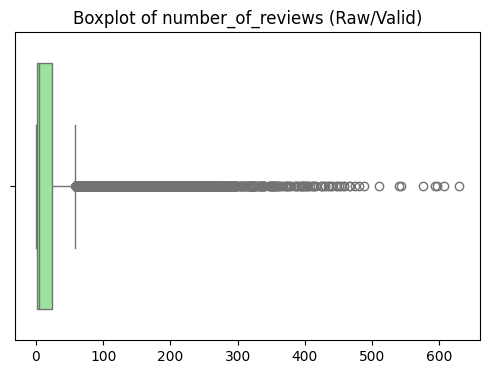


>>> reviews_per_month (dtype: float64)
Missing (NaN) = 10,052
Min=0.01, Max=58.50, Mean=1.37, Median=0.72, Std=1.68


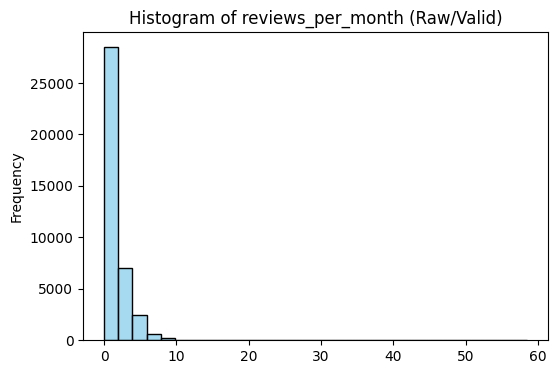

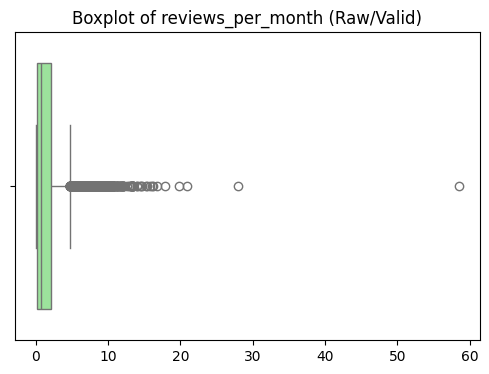


>>> calculated_host_listings_count (dtype: float64)
Missing (NaN) = 0
Min=1.00, Max=327.00, Mean=7.14, Median=1.00, Std=32.95


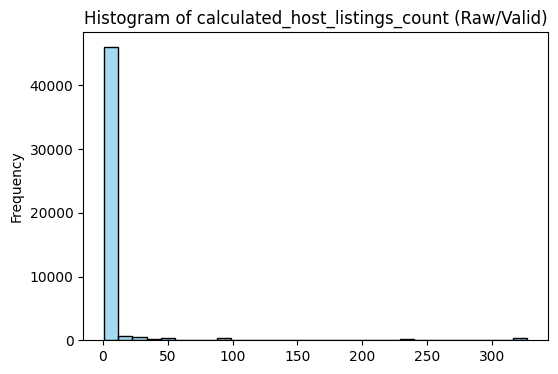

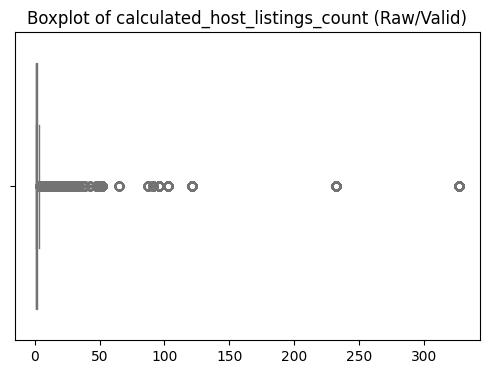


>>> availability_365 (dtype: float64)
Missing (NaN) = 0
Min=0.00, Max=365.00, Mean=112.78, Median=45.00, Std=131.62


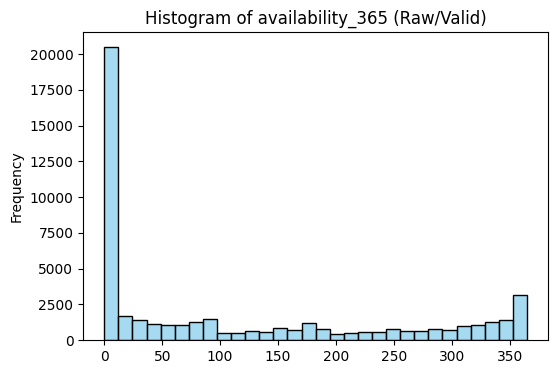

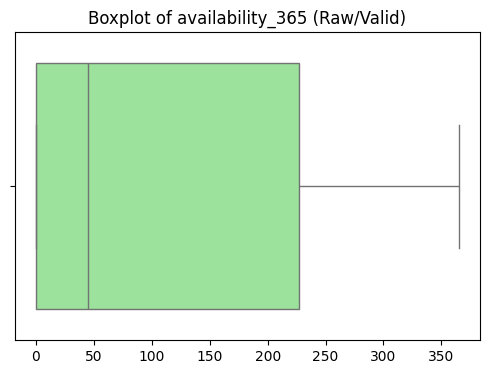

In [2]:
# Cell 2: EDA Numeric
from src.visualization import plot_histogram, plot_boxplot

print("--- PHÂN TÍCH TÍNH HỢP LỆ VÀ MISSING CỦA CÁC CỘT SỐ THÔ ---")

for name in numeric_cols:
    col = cols_dict[name]["values"]

    # 1. Kiểm tra Missing (NaN)
    missing_nan = 0
    if col.dtype == np.float64:
        missing_nan = np.sum(np.isnan(col))
    
    # 2. Kiểm tra Giá trị Không phải số/Invalid (nếu dtype là object)    
    print(f"\n>>> {name} (dtype: {col.dtype})")
    
    try:
        # Tính toán thống kê chỉ trên các giá trị hợp lệ
        valid_mask = ~np.isnan(col)
        valid_data = col[valid_mask]
        
        col_min = np.nanmin(valid_data)
        col_max = np.nanmax(valid_data)
        col_mean = np.nanmean(valid_data)
        col_median = np.nanmedian(valid_data)
        col_std = np.nanstd(valid_data)
        
        print(f"Missing (NaN) = {missing_nan:,}")
        print(f"Min={col_min:.2f}, Max={col_max:.2f}, Mean={col_mean:.2f}, "
              f"Median={col_median:.2f}, Std={col_std:.2f}")

        # Trực quan hóa
        plot_histogram(valid_data, title=f"Histogram of {name} (Raw/Valid)")
        plot_boxplot(valid_data, title=f"Boxplot of {name} (Raw/Valid)")
        
    except Exception as e:
        # Nếu không thể tính toán (có giá trị không phải số thực/chuỗi rỗng), báo cáo
        print(f"DỮ LIỆU KHÔNG HỢP LỆ: Không thể tính toán thống kê. Lỗi: {e}")
        print(f"Tổng số phần tử: {len(col):,}")
        # Kiểm tra nhanh số lượng chuỗi rỗng nếu cột là object
        if col.dtype == object:
             missing_str = np.sum(col == '')
             print(f"Giá trị rỗng ('') được tìm thấy: {missing_str:,}")



--- PHÂN TÍCH CÁC CỘT PHÂN LOẠI THÔ ---

>>> id (dtype: float64)
Số lượng giá trị duy nhất (Unique): 48,895
Missing (dạng chuỗi rỗng): 0


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


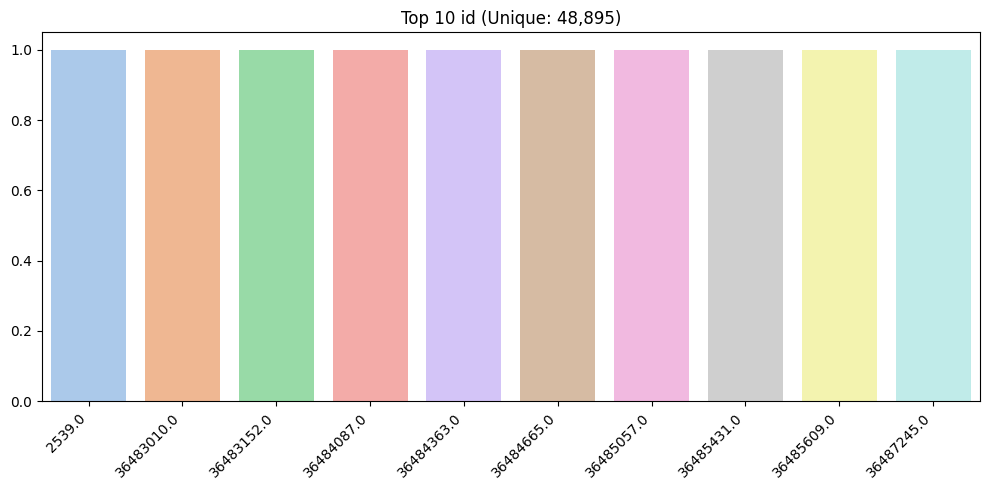


>>> name (dtype: object)
Số lượng giá trị duy nhất (Unique): 47,906
Missing (dạng chuỗi rỗng): 16


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


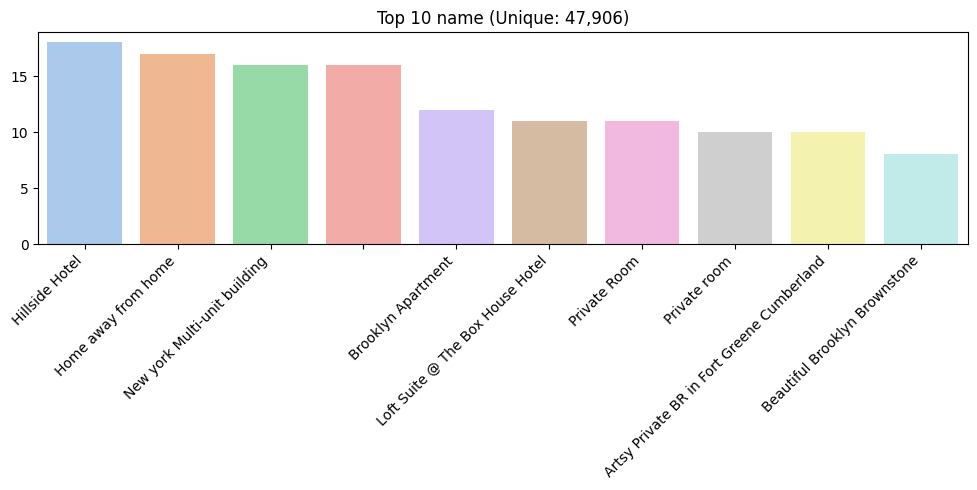


>>> host_id (dtype: float64)
Số lượng giá trị duy nhất (Unique): 37,457
Missing (dạng chuỗi rỗng): 0


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


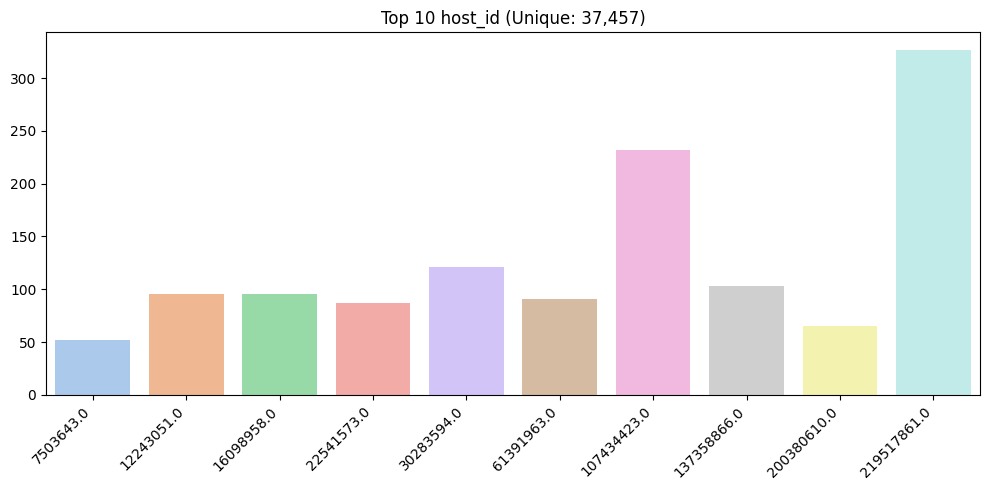


>>> host_name (dtype: object)
Số lượng giá trị duy nhất (Unique): 11,453
Missing (dạng chuỗi rỗng): 21


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


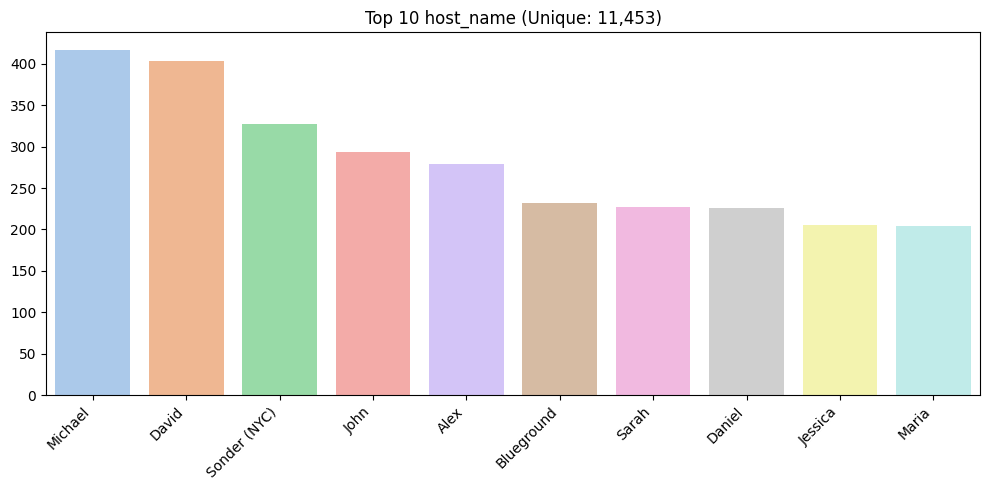


>>> neighbourhood_group (dtype: object)
Số lượng giá trị duy nhất (Unique): 5
Missing (dạng chuỗi rỗng): 0


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


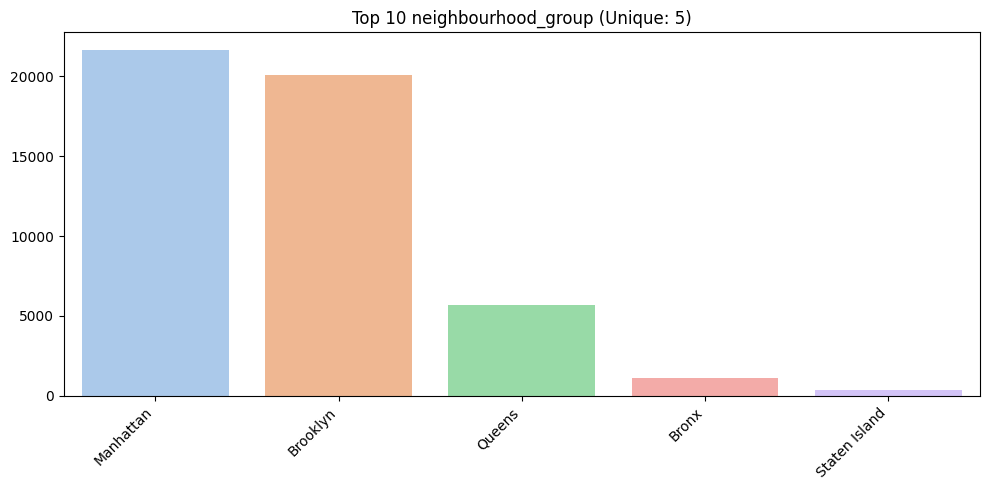


>>> neighbourhood (dtype: object)
Số lượng giá trị duy nhất (Unique): 221
Missing (dạng chuỗi rỗng): 0


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


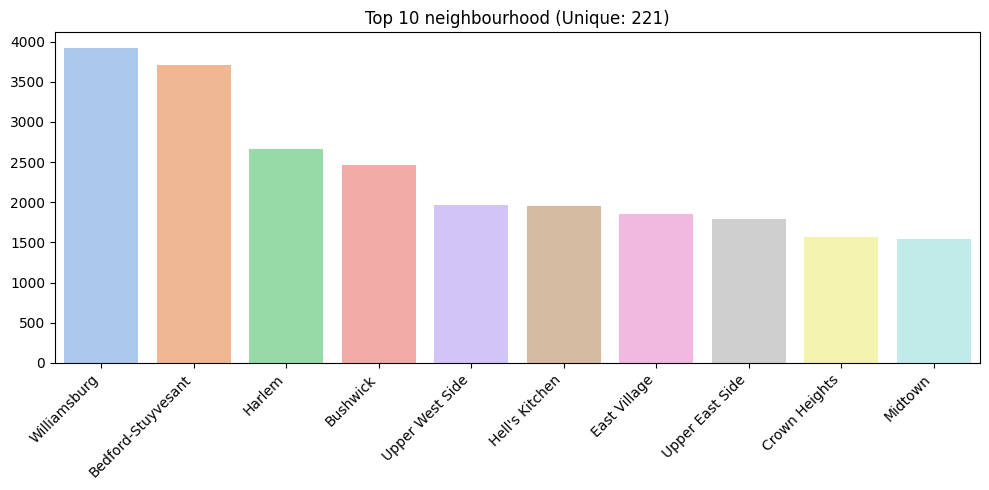


>>> room_type (dtype: object)
Số lượng giá trị duy nhất (Unique): 3
Missing (dạng chuỗi rỗng): 0


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


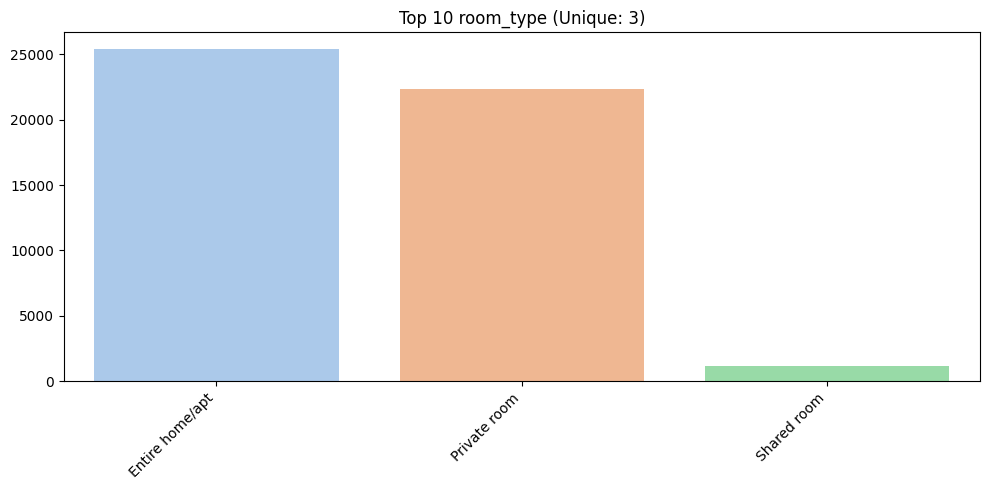


>>> last_review (dtype: object)
Số lượng giá trị duy nhất (Unique): 1,765
Missing (dạng chuỗi rỗng): 10,052


d:\Nam3\LTKHDL\Lab2\NYC_Airbnb_analysis\src\visualization.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y=counts, palette='pastel', dodge=False, legend = False)


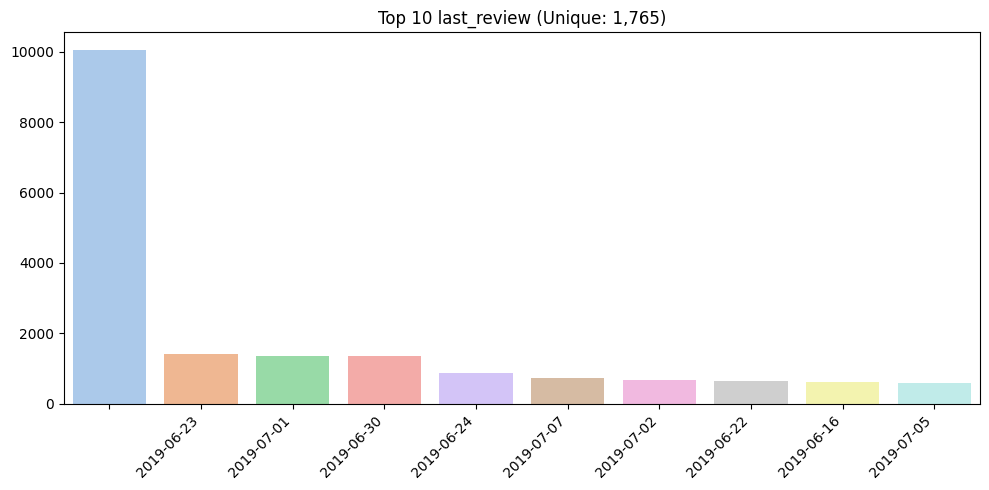

In [3]:
# Cell 3: EDA Categorical (Trên Dữ liệu THÔ, sau khi convert_columns)
from src.visualization import plot_bar

print("\n--- PHÂN TÍCH CÁC CỘT PHÂN LOẠI THÔ ---")

for name in categorical_cols:
    col = cols_dict[name]["values"]
    
    # 1. Kiểm tra Missing (Chuỗi rỗng)
    # Đảm bảo cột là object/string để so sánh với ''
    col_str = np.asarray(col, dtype=object)
    missing_count = np.sum(col_str == '')
    
    # 2. Đếm số lượng giá trị duy nhất
    values, counts = np.unique(col_str, return_counts=True)
    
    # Sắp xếp top 10
    sorted_idx = np.argsort(counts)[::-1][:10]
    
    print(f"\n>>> {name} (dtype: {col.dtype})")
    print(f"Số lượng giá trị duy nhất (Unique): {len(values):,}")
    print(f"Missing (dạng chuỗi rỗng): {missing_count:,}") 
    
    # Trực quan hóa Top 10
    plot_bar(
        values[sorted_idx], 
        counts[sorted_idx], 
        title=f"Top 10 {name} (Unique: {len(values):,})"
    )

Nhận xét chung về các cột numeric:
1. Các cột vị trí (latitude, longitude) ổn định và sạch
- Không có missing.
- Phân bố hẹp, độ lệch chuẩn nhỏ → dữ liệu vị trí ở mức ổn, chỉ có vài outlier nhẹ.
2. Các biến numeric quan trọng đều bị lệch phải mạnh (right-skewed).
- Price, minimum_nights, number_of_reviews, calculated_host_listings_count đều có mean >> median.
- Nhiều giá trị cực trị (ví dụ price lên đến 10,000; minimum_nights đến 1250).
3. Một số cột có rất nhiều outlier rõ ràng.
- Boxplot cho price, minimum_nights, number_of_reviews, availability_365 đều có nhiều điểm nằm xa whiskers.
- Điều này cho thấy dataset không phân bố chuẩn, đặc biệt với price.
4. Chỉ một cột có missing lớn: reviews_per_month (~10k dòng).
- Missing nhiều khả năng xuất phát từ việc listing không có review.
- Cần xử lý missing (gán median) ở bước preprocessing.
5. Nhìn chung dữ liệu thô có chất lượng tốt nhưng phân bố không đồng đều.

Nhận xét chung các cột categoric:
1. Mất Cân Bằng Cực Lớn:
- neighbourhood_group: Chủ yếu tập trung ở Manhattan và Brooklyn (chiếm hơn 80% listings).
- room_type: Chủ yếu là Entire home/apt và Private room. Shared room rất ít.

2. Cột High-Cardinality (Nhiều giá trị duy nhất):
- neighbourhood (221 unique) và host_id (37,457 unique) là những cột có quá nhiều giá trị duy nhất, không phù hợp để mã hóa trực tiếp (như one-hot encoding).

3. Dấu hiệu Chủ nhà Chuyên nghiệp:
- Biểu đồ host_id và host_name cho thấy một số ít chủ nhà sở hữu một lượng lớn listing (top host có hơn 300 listing), cho thấy sự tồn tại của các Host chuyên nghiệp.

4. Dữ liệu Thời gian:
- last_review là cột ngày tháng cần được chuyển đổi thành biến số liên tục (ví dụ: "Số ngày kể từ đánh giá cuối cùng").

5. Giá trị Thiếu (Missing):
- Tất cả các cột phân loại có giá trị thiếu (name, host_name, last_review) đều có số lượng rất ít (chỉ 1 giá trị), việc thay thế bằng 'Unknown' là hợp lý.

# 2. EDA trên data đã tiền xử lý

In [4]:
# đọc file tiền xử lý
import sys, os
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)


header, rows_processed = load_airbnb("AB_NYC_2019_preprocessed.csv", "processed")
cols_dict = convert_columns(rows_processed, header)

# Tách cột numeric và categorical
# Phân loại cột numeric và categorical (đúng theo logic)
numeric_cols = [name for name, d in cols_dict.items() 
                if d["is_numeric"] and name not in ["id", "host_id"]]

for name in numeric_cols:
    # Ép kiểu dữ liệu (values) của cột numeric sang float64
    if cols_dict[name]['values'].dtype != np.float64:
        # Sử dụng np.asarray để đảm bảo là mảng NumPy, rồi ép kiểu
        cols_dict[name]['values'] = np.asarray(cols_dict[name]['values'], dtype=np.float64)
        print(f"Ép kiểu cột {name} sang float64 thành công.")

categorical_cols = [name for name, d in cols_dict.items() 
                    if not d["is_numeric"] or name in ["id", "host_id"]]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)



Numeric columns: ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Categorical columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


Phân tích dữ liệu số và trực quan hóa một vài cột số

--- 1. Kiểm tra Phân bố và Outlier của các cột Số (Sau khi xử lý Missing) ---


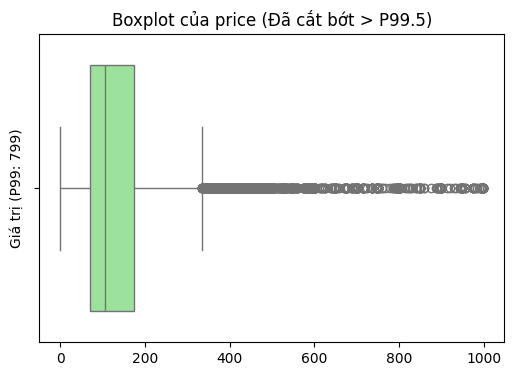

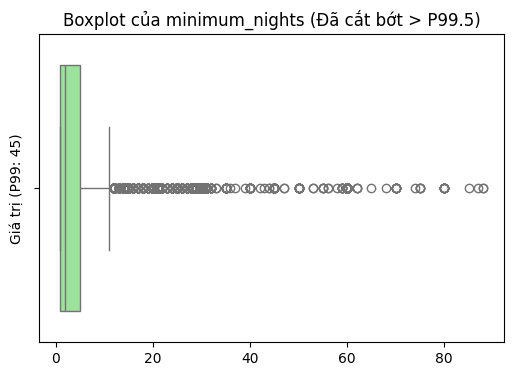

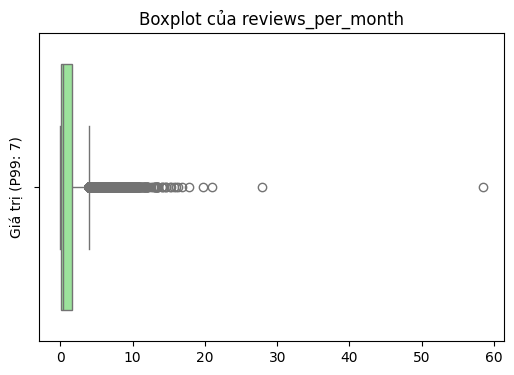

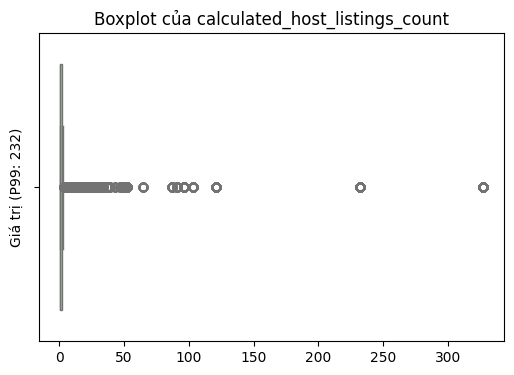

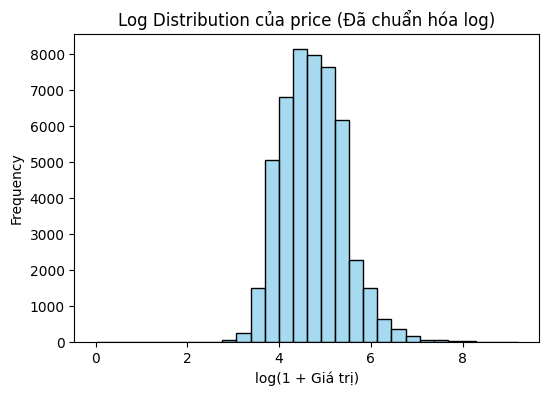

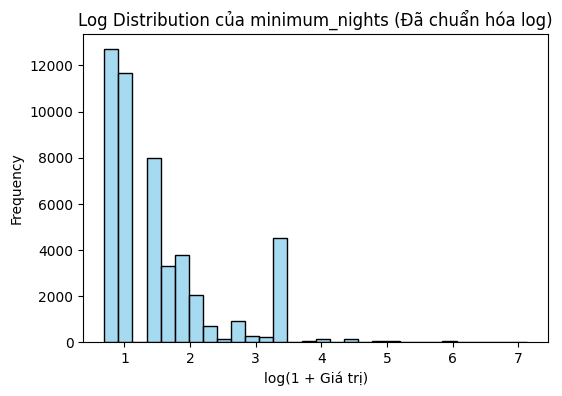

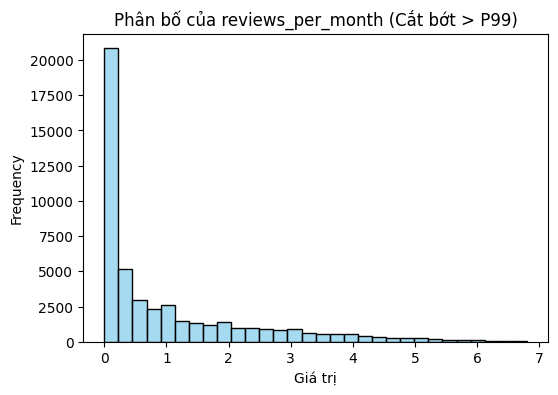

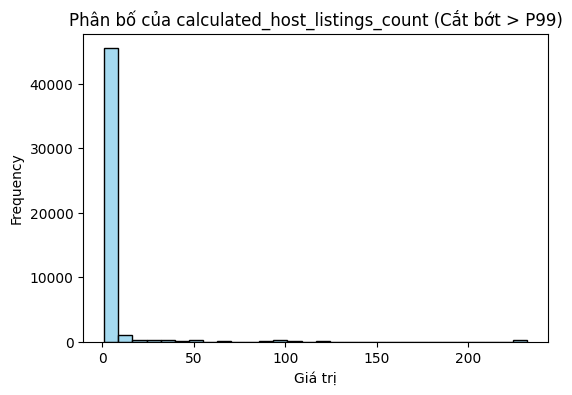

In [5]:
print("--- 1. Kiểm tra Phân bố và Outlier của các cột Số (Sau khi xử lý Missing) ---")

data_to_check = ['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count']

# A. Trực quan hóa bằng Boxplot (Kiểm tra Outlier)
for name in data_to_check:
    col_data = cols_dict[name]['values']
    # Sử dụng np.percentile để xác định ngưỡng cho tiêu đề Boxplot 
    # (Để người đọc hình dung độ biến thiên)
    p99 = np.percentile(col_data, 99)
    
    # Do price, minimum_nights có outlier quá lớn, cần cắt (clip) tạm thời cho Boxplot dễ nhìn
    if name in ['price', 'minimum_nights']:
        # Chỉ hiển thị các giá trị dưới 99.5 percentile cho Boxplot
        clipped_data = col_data[col_data < np.percentile(col_data, 99.5)]
        plot_boxplot(
            clipped_data, 
            title=f"Boxplot của {name} (Đã cắt bớt > P99.5)", 
            ylabel=f"Giá trị (P99: {p99:,.0f})"
        )
    else:
        plot_boxplot(
            col_data, 
            title=f"Boxplot của {name}", 
            ylabel=f"Giá trị (P99: {p99:,.0f})"
        )

# B. Trực quan hóa bằng Histogram (Kiểm tra Lệch)
for name in data_to_check:
    col_data = cols_dict[name]['values']
    
    # Histogram với Log Transformation cho Price và Minimum Nights để thấy rõ phân bố lệch
    if name in ['price', 'minimum_nights']:
        valid_mask = ~np.isnan(col_data) # Lấy mặt nạ các giá trị KHÔNG phải NaN
        # np.log1p = log(1 + x)
        log_data = np.log1p(col_data[valid_mask])
        plot_histogram(
            log_data, 
            title=f"Log Distribution của {name} (Đã chuẩn hóa log)",
            xlabel="log(1 + Giá trị)"
        )
    else:
        # Giới hạn trục x cho các cột khác để loại bỏ phần outlier cực lớn khỏi biểu đồ
        limit = np.percentile(col_data, 99)
        plot_histogram(
            col_data[col_data <= limit], 
            title=f"Phân bố của {name} (Cắt bớt > P99)",
            xlabel="Giá trị"
        )

Đặc điểm, mô tả & nhận xét
- Phân bố (Log): Phân bố gần như chuẩn sau khi chuẩn hóa log, chứng minh việc Log Transformation là hiệu quả và cần thiết.
- Outlier (Boxplot): Vẫn tồn tại nhiều outlier (các chấm tròn bên phải, ngay cả khi đã cắt bớt > P99.5).
- Cần thực hiện Capping (xử lý giới hạn trên) ở bước feature engineering tiếp theo để khống chế ảnh hưởng của các giá trị cực trị.

## Các câu hỏi khám phá

### Câu hỏi: Ảnh hưởng của chủ nhà lớn(calulated_host_listings_count) lên giá như thế nào? Liệu chủ nhà lớn có nhiều listing có tính giá cao hơn hay rẻ hơn không?



--- 7.1. Ảnh hưởng của Chủ nhà Lớn lên Giá ---
Ngưỡng P95 của Host Listings Count: 15 listings.
Median Price (Small Host <= 15.0 listings): $100.00
Median Price (Large Host > 15.0 listings): $180.00


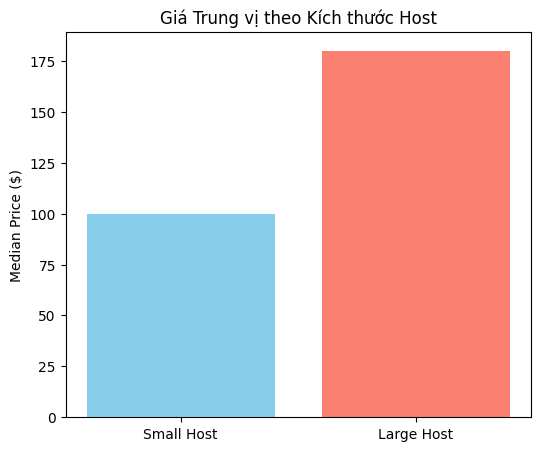

In [6]:
# Cell 5: Phân tích Chủ nhà Lớn (Host Count) và Giá (NumPy Pure)
import matplotlib.pyplot as plt
print("\n--- 7.1. Ảnh hưởng của Chủ nhà Lớn lên Giá ---")

# Giả định: Chủ nhà Lớn là Host có > 10 listings (P95 của cột này)
host_counts = cols_dict['calculated_host_listings_count']['values']
prices = cols_dict['price']['values']

# Xác định ngưỡng P95
P95_count = np.percentile(host_counts, 95)
print(f"Ngưỡng P95 của Host Listings Count: {P95_count:.0f} listings.")

# Phân loại: Chủ nhà nhỏ (Small) vs Chủ nhà lớn (Large)
small_host_mask = (host_counts <= P95_count)
large_host_mask = (host_counts > P95_count)

# Tính Median Price cho từng nhóm
median_price_small = np.median(prices[small_host_mask])
median_price_large = np.median(prices[large_host_mask])

print(f"Median Price (Small Host <= {P95_count} listings): ${median_price_small:.2f}")
print(f"Median Price (Large Host > {P95_count} listings): ${median_price_large:.2f}")

# Trực quan hóa (Có thể dùng plot_bar nếu muốn)
plt.figure(figsize=(6, 5))
plt.bar(['Small Host', 'Large Host'], [median_price_small, median_price_large], color=['skyblue', 'salmon'])
plt.title('Giá Trung vị theo Kích thước Host')
plt.ylabel('Median Price ($)')
plt.show()

#### Nhận xét: 
- Có sự chênh lệch rất lớn về giá. 
- Chủ nhà lớn (chuyên nghiệp) tính giá trung vị cao hơn 80% ($180 vs $100) so với chủ nhà nhỏ. Điều này chứng minh calculated_host_listings_count là một biến dự báo cực kỳ mạnh và cần được giữ lại/xử lý outlier một cách cẩn thận (Outlier cần được capping, như đã thấy trên boxplot).

### Câu hỏi: Đánh giá (number_of_reviews) nhiều thì có tính giá cao hơn không?


--- 7.2. Tác động của Đánh giá lên Giá ---
Ngưỡng P50 của Review Count: 5 reviews.
Median Price (Zero Reviews): $120.00
Median Price (Low Reviews <= 5.0): $101.00
Median Price (High Reviews > 5.0): $101.00


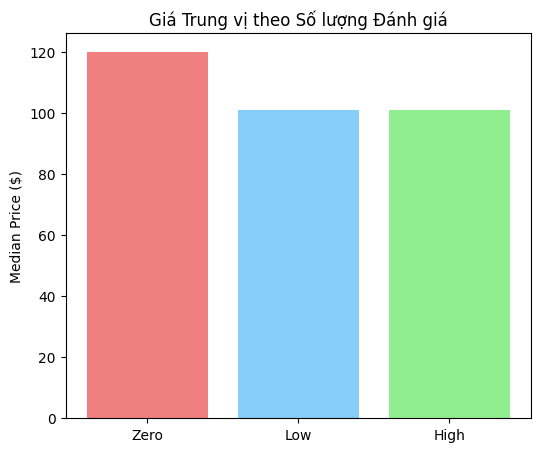

In [7]:
# Cell 6: Phân tích Review Count và Giá (NumPy Pure)

print("\n--- 7.2. Tác động của Đánh giá lên Giá ---")

review_counts = cols_dict['number_of_reviews']['values']
prices = cols_dict['price']['values']

# Phân loại thành 3 nhóm (Tận dụng phân bố lệch):
# 1. Zero Reviews: Host mới/ Listing kém (reviews_per_month = 0.0)
# 2. Low Reviews: <= P50 (khoảng 3 reviews)
# 3. High Reviews: > P50 

P50_reviews = np.percentile(review_counts, 50)
print(f"Ngưỡng P50 của Review Count: {P50_reviews:.0f} reviews.")

zero_review_mask = (review_counts == 0)
low_review_mask = (review_counts > 0) & (review_counts <= P50_reviews)
high_review_mask = (review_counts > P50_reviews)

# Tính Median Price cho từng nhóm
median_price_zero = np.median(prices[zero_review_mask])
median_price_low = np.median(prices[low_review_mask])
median_price_high = np.median(prices[high_review_mask])

print(f"Median Price (Zero Reviews): ${median_price_zero:.2f}")
print(f"Median Price (Low Reviews <= {P50_reviews}): ${median_price_low:.2f}")
print(f"Median Price (High Reviews > {P50_reviews}): ${median_price_high:.2f}")

# Trực quan hóa
plt.figure(figsize=(6, 5))
plt.bar(['Zero', 'Low', 'High'], [median_price_zero, median_price_low, median_price_high], color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Giá Trung vị theo Số lượng Đánh giá')
plt.ylabel('Median Price ($)')
plt.show()

#### Nhận xét:
- Giá trị Bất thường: Listing Zero Reviews có giá trung vị cao nhất ($120). Điều này đi ngược lại dự đoán thông thường (listing mới/không review thường rẻ hơn).
- Giải thích: Điều này có thể do nhóm Zero Reviews bao gồm các listing mới (chưa kịp nhận review) và các listing cao cấp/đắt tiền (có lượng giao dịch thấp).
- Nhóm Có Review: Hai nhóm Low Reviews và High Reviews có giá trung vị gần như bằng nhau ($101).
- Kết luận: 
Mối quan hệ giữa số lượng reviews và giá không tuyến tính (Non-linear) và không trực tiếp.

### Câu hỏi: Có sự khác biệt về giá theo room_type x neighbourhood_group không?

In [8]:
# Cell 7: Phân tích chéo Room Type và Neighbourhood Group (NumPy Pure)

print("\n--- 7.3. Phân bố Giá theo Room Type và Khu vực ---")

room_types = cols_dict['room_type']['values']
neighbourhood_groups = cols_dict['neighbourhood_group']['values']
prices = cols_dict['price']['values']

unique_types = np.unique(room_types)
unique_groups = np.unique(neighbourhood_groups)

results = {}

for r_type in unique_types:
    results[r_type] = {}
    for group in unique_groups:
        # Lọc dữ liệu theo cả hai điều kiện
        mask = (room_types == r_type) & (neighbourhood_groups == group)
        group_prices = prices[mask]
        
        if len(group_prices) > 50: # Chỉ tính nếu có đủ mẫu
            median_val = np.median(group_prices)
            results[r_type][group] = median_val
        else:
            results[r_type][group] = np.nan # Dùng NaN nếu không đủ mẫu

# In kết quả (có thể tạo bảng nếu cần, nhưng in ra console sẽ đơn giản hơn)
print("Median Price ($) theo Room Type x Neighbourhood Group (Mẫu > 50):")

for r_type in unique_types:
    row_output = f"{r_type}: "
    for group in unique_groups:
        median_price = results[r_type].get(group)
        if not np.isnan(median_price):
            row_output += f"{group}: ${median_price:.0f} | "
    print(row_output)


--- 7.3. Phân bố Giá theo Room Type và Khu vực ---
Median Price ($) theo Room Type x Neighbourhood Group (Mẫu > 50):
Entire home/apt: Bronx: $100 | Brooklyn: $145 | Manhattan: $191 | Queens: $120 | Staten Island: $100 | 
Private room: Bronx: $54 | Brooklyn: $65 | Manhattan: $90 | Queens: $60 | Staten Island: $50 | 
Shared room: Bronx: $40 | Brooklyn: $36 | Manhattan: $69 | Queens: $37 | 


Nhận xét:
1. Tác động Mạnh mẽ của room_type: 
- Ở mọi khu vực (Neighbourhood Group), Entire home/apt luôn có giá trung vị cao hơn đáng kể so với Private room, và Private room cao hơn Shared room.
2. Tác động Kết hợp (Vị trí x Loại phòng):
- Manhattan duy trì vị thế dẫn đầu ở mọi loại phòng. Giá nhà nguyên căn ở Manhattan ($191) cao gấp rưỡi Queens ($120) và gấp gần gấp đôi Brooklyn ($145).
- Sự chênh lệch giữa các nhóm là lớn nhất ở loại phòng cao cấp (Entire home/apt).
3. Tác động Địa lý vẫn Quan trọng: Ngay cả đối với cùng loại phòng (Private room), việc nằm ở Manhattan ($90) hay Bronx ($54) tạo ra sự khác biệt $36 (khoảng $66\%$).

### Câu hỏi: Giá nhà phân bố như thế nào trong cùng 1 neighbourhood group?

Dữ liệu đã sẵn sàng cho phân tích chéo địa lý.


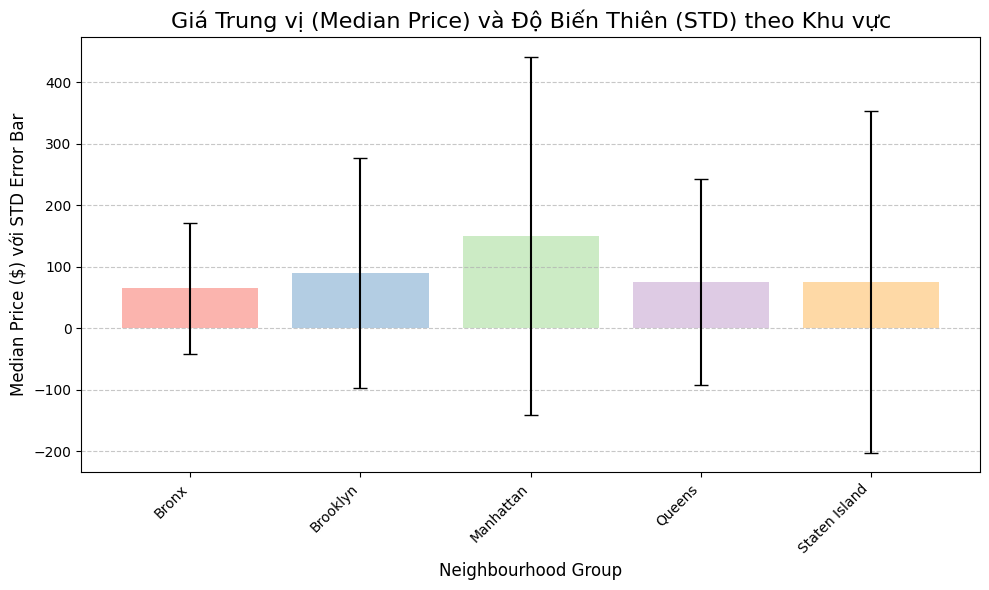

In [9]:
prices = cols_dict['price']['values']
neighbourhood_groups = cols_dict['neighbourhood_group']['values']

print("Dữ liệu đã sẵn sàng cho phân tích chéo địa lý.")
unique_groups = np.unique(neighbourhood_groups)
median_prices = []
std_prices = []
groups_list = []

for group in unique_groups:
    mask = (neighbourhood_groups == group)
    group_prices = prices[mask]
    
    # Chỉ tính cho các nhóm có đủ dữ liệu (> 100 listings)
    if len(group_prices) > 100:
        median_prices.append(np.median(group_prices))
        std_prices.append(np.std(group_prices))
        groups_list.append(group)

# Chuyển đổi list sang mảng NumPy để dùng trong Matplotlib
median_prices_np = np.array(median_prices)
std_prices_np = np.array(std_prices)

# Trực quan hóa bằng plt.bar (Matplotlib) để tránh lỗi Seaborn
plt.figure(figsize=(10, 6))

plt.bar(
    groups_list, 
    median_prices_np, 
    yerr=std_prices_np, # Độ lệch chuẩn làm thanh lỗi
    capsize=5, 
    color=plt.cm.Pastel1.colors[:len(groups_list)] # Sử dụng color palette từ Matplotlib
)

plt.title('Giá Trung vị (Median Price) và Độ Biến Thiên (STD) theo Khu vực', fontsize=16)
plt.xlabel('Neighbourhood Group', fontsize=12)
plt.ylabel('Median Price ($) với STD Error Bar', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Nhận xét từ biểu đồ: 
1. Giá Trung vị Cao nhất: 
- Manhattan có giá trung vị cao nhất (khoảng 150$), tiếp theo là Brooklyn và Queens.
2. Độ Biến Thiên Cực Cao: 
- Thanh lỗi (STD Error Bar) là cực kỳ lớn ở Manhattan (lên đến khoảng 400$) và Staten Island (cũng rất lớn).
- Điều này có nghĩa là, ngay trong cùng một khu vực Manhattan, giá cả biến thiên rất mạnh, có cả các listing giá rất thấp và các listing giá cực kỳ cao.

### Kết luận: Sự Cần thiết của Grid ID
 1. Vì sao không dùng neighbourhood?
Mặc dù biến neighbourhood chi tiết hơn neighbourhood_group, nhưng dữ liệu EDA đã chứng minh rằng:
- Độ biến thiên nội tại cao (High Internal STD): Biểu đồ giá trung vị và STD cho thấy độ lệch chuẩn (STD) của giá trong các khu vực lớn như Manhattan và Brooklyn là rất lớn. Điều này có nghĩa là, ngay trong cùng một neighbourhood (ví dụ: Williamsburg hay Upper West Side), giá trị listing vẫn biến thiên mạnh mẽ. Biến neighbourhood không đủ để phân biệt sự khác biệt về giá giữa các con phố.
- Vấn đề tỷ lệ mẫu và tầm quan trọng: Các khu vực lớn, phổ biến (như Williamsburg) có thể che lấp các khu vực nhỏ hơn.
- Vấn đề khoảng cách (Geographical Continuity): Biến neighbourhood chỉ là một tên định danh. Nó không chứa thông tin về khoảng cách địa lý thực tế giữa các listing. Hai listing ở hai bên ranh giới của hai neighbourhood khác nhau có thể có giá hoàn toàn khác nhau trong mô hình, dù chúng chỉ cách nhau một con đường.

2. Mục tiêu Đa chiều của Grid ID<br>
Mục đích của Grid ID là tạo ra một chỉ số tổng hợp về "Sức mạnh Thị trường" (Market Strength) của từng ô lưới địa lý vi mô, bằng cách kết hợp các thuộc tính sau:
 - Giá Trị Trung tâm (Median Price): Phản ánh giá thuê điển hình của khu vực đó.
 <br> Biến nguồn: price (Median)
 - Độ Biến Thiên (STD): Phản ánh tính đồng nhất và độ ổn định của giá trong ô lưới.
 <br>Biến nguồn: price (STD)
 - Mật độ Listing (Count of Listings): Phản ánh mức độ phổ biến và nguồn cung của khu vực.
<br>Biến nguồn: Count of Listings
 - Chất lượng Review (Mean/Median): Phản ánh mức độ hài lòng của khách hàng đối với khu vực.
<br>Biến nguồn: number_of_reviews (Mean/Median)
 - Grid ID: Định danh duy nhất cho từng ô lưới địa lý.
<br>Biến nguồn: latitude, longitude


--- BẮT ĐẦU EDA CHUYÊN SÂU: Trực quan hóa Target Đa Mức ---


Text(0, 0.5, 'Vĩ độ (Latitude)')

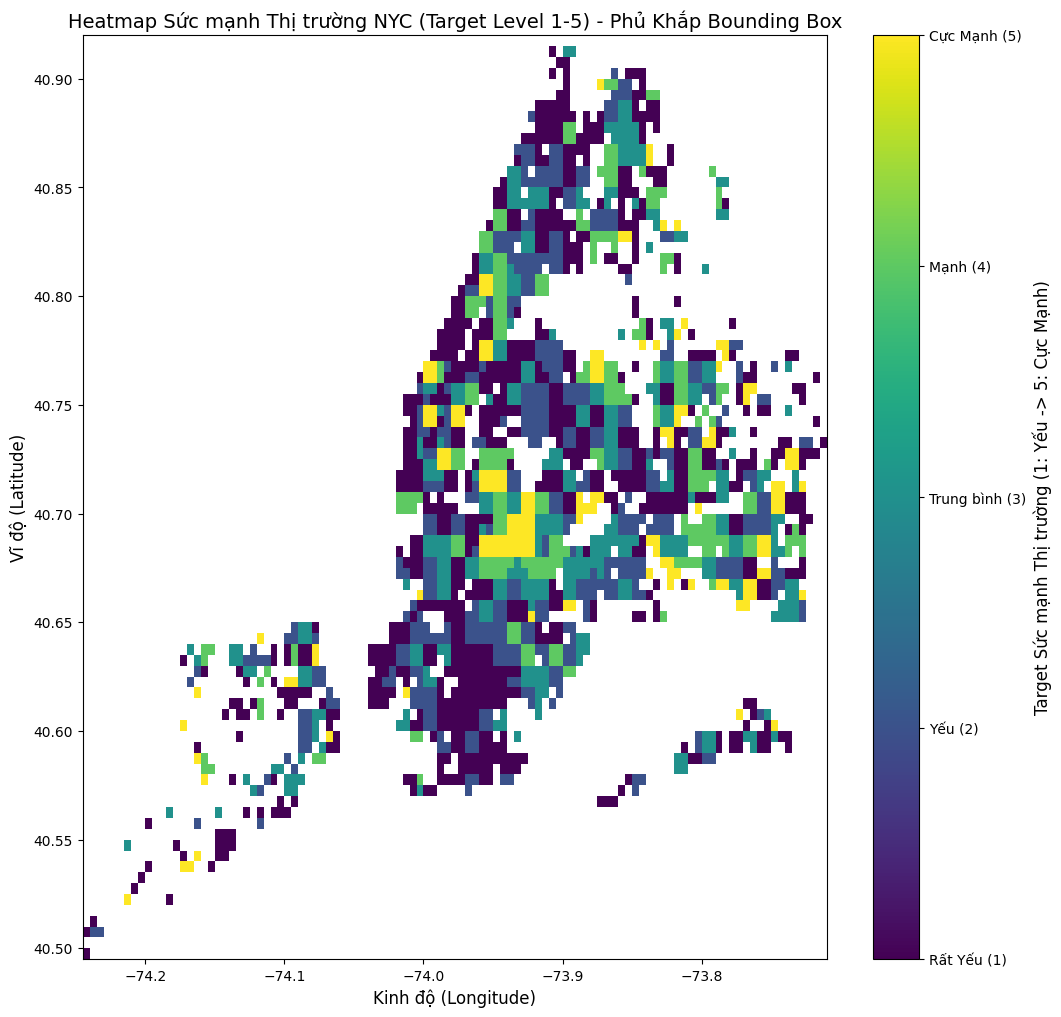

In [10]:
# notebooks/01_data_exploration.ipynb (Phần EDA Chuyên sâu)

import matplotlib.pyplot as plt
import numpy as np
import os
import sys

# Đảm bảo import các hàm cần thiết
# Giả sử hàm load_data và convert_columns đã được định nghĩa trong src/data_processing
# ==========================================================
# 1. LOAD DỮ LIỆU ĐÃ CÓ FEATURE
# ==========================================================

print("--- BẮT ĐẦU EDA CHUYÊN SÂU: Trực quan hóa Target Đa Mức ---")

# Load file đã có Feature
# Sử dụng hàm load_data đã gộp: load_data(filename="AB_NYC_2019_featured.csv", source_dir="processed")
header_featured, rows_featured = load_airbnb(
    filename="AB_NYC_2019_featured.csv", 
    source_dir="processed"
)

# Chuyển đổi lại các cột số (cần thiết cho plotting)
# Đảm bảo các cột này là float:
numeric_cols_for_plot = [
    'latitude', 'longitude', 'target_market_strength_level', 'market_strength_index' 
]
cols_dict_featured = convert_columns(rows_featured, header_featured, numeric_cols=numeric_cols_for_plot) 

# notebooks/01_data_exploration.ipynb (Phần Trực quan hóa Heatmap)

# ... (Phần 1: Load dữ liệu và xử lý Mask đã có) ...

# --- Lấy các giá trị cần thiết ---
lat_values = np.array(cols_dict_featured['latitude']['values'])
lon_values = np.array(cols_dict_featured['longitude']['values'])
target_levels = np.array(cols_dict_featured['target_market_strength_level']['values']) 

# Loại bỏ các dòng có giá trị Target Level bị thiếu (NaN)
valid_mask = ~np.isnan(target_levels) & ~np.isnan(lat_values) & ~np.isnan(lon_values)
lat_values = lat_values[valid_mask]
lon_values = lon_values[valid_mask]
target_levels = target_levels[valid_mask]

# ==========================================================
# 2. TẠO CANVAS 2D VÀ DÙNG PCOLORMESH ĐỂ HIỂN THỊ HÌNH DẠNG ĐẦY ĐỦ
# ==========================================================

import matplotlib.pyplot as plt
import numpy as np

GRID_SIZE_FINE = 0.005 # Độ phân giải lưới nhỏ nhất

# 1. TÍNH TOÁN CÁC BIÊN (BOUNDARIES) CỦA TOÀN BỘ BẢN ĐỒ
# Lấy min/max lat/lon và làm tròn theo kích thước lưới
lon_min = np.floor(np.min(lon_values) / GRID_SIZE_FINE) * GRID_SIZE_FINE
lon_max = np.ceil(np.max(lon_values) / GRID_SIZE_FINE) * GRID_SIZE_FINE
lat_min = np.floor(np.min(lat_values) / GRID_SIZE_FINE) * GRID_SIZE_FINE
lat_max = np.ceil(np.max(lat_values) / GRID_SIZE_FINE) * GRID_SIZE_FINE

# 2. TẠO CÁC TRỤC GRID CHO PCOLORMESH
# X và Y là tọa độ các CẠNH của ô lưới.
X = np.arange(lon_min, lon_max + GRID_SIZE_FINE, GRID_SIZE_FINE)
Y = np.arange(lat_min, lat_max + GRID_SIZE_FINE, GRID_SIZE_FINE)

# 3. TẠO CANVAS 2D (MẢNG Z)
# Kích thước: (số lượng biên Y - 1) x (số lượng biên X - 1)
Z = np.full((len(Y) - 1, len(X) - 1), np.nan) # Khởi tạo bằng NaN để Matplotlib bỏ qua ô trống

# 4. GÁN GIÁ TRỊ TARGET LEVEL VÀO CANVAS
# Tìm chỉ mục (index) của từng điểm trong mảng 2D
lon_indices = np.floor((lon_values - lon_min) / GRID_SIZE_FINE).astype(int)
lat_indices = np.floor((lat_values - lat_min) / GRID_SIZE_FINE).astype(int)

# Gán giá trị Target Level vào mảng Z
for i in range(len(target_levels)):
    # Đảm bảo index nằm trong giới hạn của mảng Z
    if 0 <= lat_indices[i] < Z.shape[0] and 0 <= lon_indices[i] < Z.shape[1]:
        # Chúng ta gán giá trị của listing vào ô lưới tương ứng
        Z[lat_indices[i], lon_indices[i]] = target_levels[i]

# --- 5. TRỰC QUAN HÓA BẰNG PCOLORMESH ---

plt.figure(figsize=(12, 12))

# Sử dụng pcolormesh: 
mesh = plt.pcolormesh(
    X, Y, Z, 
    cmap='viridis', 
    vmin=1, 
    vmax=5,
    shading='flat'
)

# Thêm Colorbar và nhãn
cbar = plt.colorbar(mesh, ticks=[1, 2, 3, 4, 5], orientation='vertical')
cbar.set_label('Target Sức mạnh Thị trường (1: Yếu -> 5: Cực Mạnh)', fontsize=12)
cbar.ax.set_yticklabels(['Rất Yếu (1)', 'Yếu (2)', 'Trung bình (3)', 'Mạnh (4)', 'Cực Mạnh (5)'])

plt.title('Heatmap Sức mạnh Thị trường NYC (Target Level 1-5) - Phủ Khắp Bounding Box', fontsize=14)
plt.xlabel('Kinh độ (Longitude)', fontsize=12)
plt.ylabel('Vĩ độ (Latitude)', fontsize=12)
